<a href="https://colab.research.google.com/github/Adelakun1999/data/blob/master/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
mnist=keras.datasets.mnist

In [19]:
pip install tensorflow==1.15

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 23 kB/s 
     |████████████████████████████████| 3.8 MB 42.5 MB/s 
     |████████████████████████████████| 50 kB 7.7 MB/s 
     |████████████████████████████████| 503 kB 49.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=f2e96b11da2170d048da0a6207d3403c11256e6898ecf740369cfa9795490acb
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
mnist=keras.datasets.mnist
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()

In [3]:
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))
# prints Training data: (60000, 28, 28), (60000,)
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))
# prints Test data: (10000, 28, 28), (10000,)
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))
# prints There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]

Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)
There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


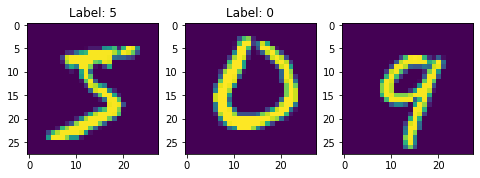

In [4]:
plt.figure(figsize=(8, 5))
plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))
plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))
plt.subplot(1,3,3)
plt.imshow(test_images[12])
plt.show()

In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]
print("x_train: {}".format(x_train.shape)) # prints x_train: (50000, 28, 28)
print("x_val: {}".format(x_val.shape)) # prints x_val: (10000, 28, 28)
print("y_train: {}".format(y_train.shape)) #prints y_train: (50000,)
print("y_val: {}".format(y_val.shape)) #prints y_val: (10000,)

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [7]:
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)


print("x_train: {}".format(x_train.shape)) #prints x_train: (50000, 784)
print("x_val: {}".format(x_val.shape)) #prints x_val: (10000, 784)
print("test_images: {}".format(test_images.shape)) #prints test_images: (10000, 784)

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [8]:
train_images.shape[1:]

(28, 28)

In [9]:
#Encode labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

**Activation functions and Neural Networks hyperparameters**

In [10]:
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

In [11]:
# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
 # first layer
 first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
 first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
 first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
 # second layer
 second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
 second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
 second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight),
 second_bias))
 # output layer
 final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
 final_bias = tf.Variable(tf.zeros([no_classes]))
 logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

 return logits

In [12]:
logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01
#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [28]:
logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01
#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

#initialise the variables
init = tf.global_variables_initializer()
epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size
#train model
with tf.Session() as session:
 session.run(init)
 for epoch in range(epochs):
   average_cost = 0
   start, end = 0, batch_size
   for i in range(iteration):
     batch_x, batch_y = x_train[start: end], y_train[start: end]
     _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
     start += batch_size
     end += batch_size
     #average loss
     average_cost += loss/iteration
 print("Epoch========{}".format(epoch))

#evaluate model
 prediction = tf.nn.softmax(logits)
 ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
 accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
 print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))
 

Epoch========19
Accuracy: 0.883400022983551


In [30]:
#Building a Sequential Feed Forward Network in Keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_labels, activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy,
 metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)
test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 36us/sample - loss: 0.6650 - acc: 0.8267 - val_loss: 0.2524 - val_acc: 0.9278
Epoch 2/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.2275 - acc: 0.9331 - val_loss: 0.1740 - val_acc: 0.9531
Epoch 3/20
50000/50000 [==============================] - 2s 32us/sample - loss: 0.1630 - acc: 0.9528 - val_loss: 0.1413 - val_acc: 0.9601
Epoch 4/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.1269 - acc: 0.9632 - val_loss: 0.1280 - val_acc: 0.9659
Epoch 5/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.1028 - acc: 0.9704 - val_loss: 0.1101 - val_acc: 0.9685
Epoch 6/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.0835 - acc: 0.9765 - val_loss: 0.0974 - val_acc: 0.9728
Epoch 7/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.0694 - acc: 0.9801 - val_loss: 0.

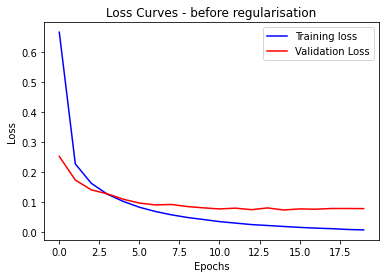

In [32]:
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation');

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 46us/sample - loss: 0.9813 - acc: 0.6916 - val_loss: 0.2993 - val_acc: 0.9135
Epoch 2/20
50000/50000 [==============================] - 2s 44us/sample - loss: 0.3813 - acc: 0.8876 - val_loss: 0.2073 - val_acc: 0.9412
Epoch 3/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.2873 - acc: 0.9156 - val_loss: 0.1671 - val_acc: 0.9531
Epoch 4/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.2355 - acc: 0.9308 - val_loss: 0.1449 - val_acc: 0.9576
Epoch 5/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.2021 - acc: 0.9407 - val_loss: 0.1236 - val_acc: 0.9640
Epoch 6/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.1775 - acc: 0.9485 - val_loss: 0.1139 - val_acc: 0.9664
Epoch 7/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.1571 - acc: 0.9528 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - after regularisation')

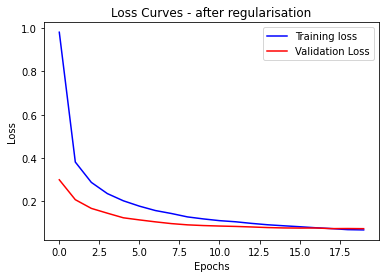

In [33]:
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))
reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val),
 epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')
